In [1]:
import os

!pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate


Saved under thinkdsp.py


# Упражнение 10.1

В разделе «Системы и свертка» на стр. 131 свертка описана как сумма сдвинутых и масштабированных копий сигнала.

А в разделе «Акустическая характеристика» на стр. 128 умножение ДПФ сигнала на передаточную функцию соответствует круговой свертке, но в предположении периодичности сигнала. В результате можно заметить, что на выходе, в начале фрагмента, слышна лишняя нота, «затекшая» из конца этого фрагмента.

К счастью, есть стандартное решение этой проблемы. Если перед вычислением ДПФ добавить достаточно нулей в конец сигнала, эффекта «заворота» можно избежать.
Измените пример в chap10.ipynb и убедитесь, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

In [2]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav


Saved under 180960__kleeb__gunshot.wav


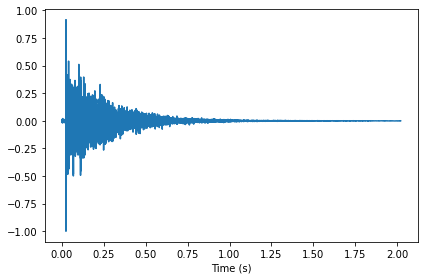

In [3]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

In [4]:
response.make_audio()

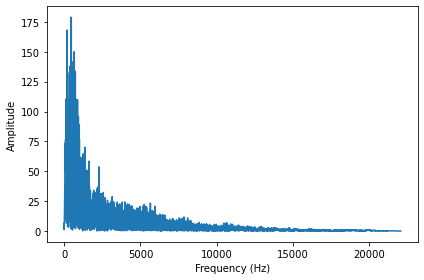

In [5]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [6]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav


Saved under 92002__jcveliz__violin-origional.wav


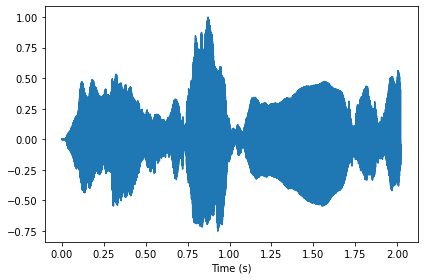

In [7]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(len(response))
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [8]:
violin.make_audio()

In [9]:
spectrum = violin.make_spectrum()

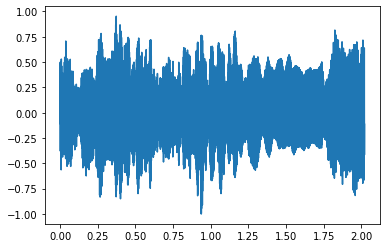

In [10]:
wave = (spectrum * transfer).make_wave()
wave.normalize()
wave.plot()

In [11]:
wave.make_audio()

Проблема с нотой решена.

# Упражнение 10.2

Библиотека Ореп AIR (свободный эфир) — это «централизованный... онлайн-ресурс для тех, кто интересуется аурализацией и данными акустической импульсной характеристики» (http://www.openairlib.net). Просмотрите эту коллекцию импульсных характеристик и скачайте ту, звучание которой интереснее.
Найдите короткие записи с той же частотой дискретизации, что и у скачанной импульсной характеристики.

Смоделируйте двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика, как сверткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

In [12]:
if not os.path.exists('stalbans_a_mono.wav'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/stalbans_a_mono.wav


Saved under stalbans_a_mono.wav


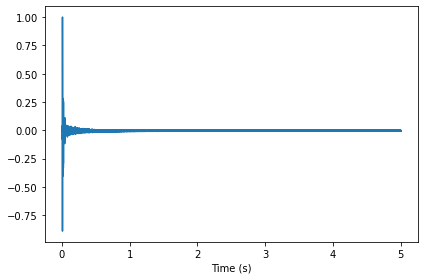

In [13]:
response = read_wave('stalbans_a_mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')
decorate(xlabel='Time (s)')

ДПФ импульсной характеристики:

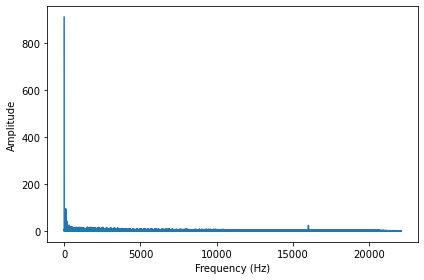

In [14]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Теперь промоделируем запись в пространстве:

In [15]:
if not os.path.exists('electric-guitar-phrase.wav'):
    !python -m wget https://github.com/timatifey/spbstu-telecom-labs-2022/raw/main/chap06/electric-guitar-phrase.wav

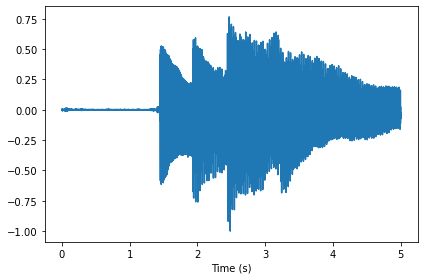

In [16]:
wave = read_wave('electric-guitar-phrase.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

In [17]:
wave.make_audio()

In [18]:
spectrum = wave.make_spectrum()

In [19]:
len(spectrum.hs), len(transfer.hs)

(110251, 110251)

In [20]:
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [21]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

С использованием свёртки:

In [22]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()

Через умножение:

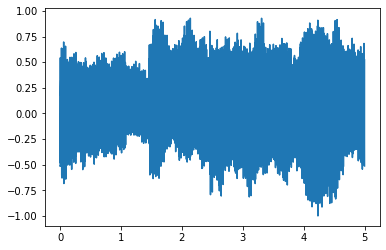

In [23]:
out_wave = (spectrum * transfer).make_wave()
out_wave.normalize()
out_wave.plot()

In [24]:
out_wave.make_audio()